In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [23]:
# Read the data
df = pd.read_csv('TSLA.csv')
# Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [24]:
df.drop(['Date'], inplace = True, axis = 1)


In [25]:
df

,Open,High,Low,Close,Adj Close,Volume
2021-06-01,209.266663,211.266663,206.850006,207.966660,207.966660,54254700
2021-06-02,206.710007,207.786667,199.713333,201.706665,201.706665,69908400
2021-06-03,200.600006,201.516663,190.406662,190.946671,190.946671,90335700
2021-06-04,193.236664,200.203339,192.399994,199.683334,199.683334,72110700
2021-06-07,197.276672,203.333328,194.293335,201.710007,201.710007,67631100
...,...,...,...,...,...,...
2024-05-21,175.509995,186.880005,174.710007,186.600006,186.600006,115266500
2024-05-22,182.850006,183.800003,178.119995,180.110001,180.110001,88313500
2024-05-23,181.800003,181.899994,173.259995,173.740005,173.740005,71975500
2024-05-24,174.839996,180.080002,173.729996,179.240005,179.240005,65479700


In [26]:
# Create a function to calculate the simple moving average 
def SMA(data, period = 30, column = 'Close'):
    return data[column].rolling(window=period).mean()

# Build and show the data set
df['SMA'] = SMA(df, 21)
df['Simple_Returns'] = df.pct_change(1)['Close']
df['Log_Returns'] = np.log(1+df['Simple_Returns'])
df['Ratios'] = df['Close'] / df['SMA']

# Show the data
df

,Open,High,Low,Close,Adj Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
2021-06-01,209.266663,211.266663,206.850006,207.966660,207.966660,54254700,NaN,NaN,NaN,NaN
2021-06-02,206.710007,207.786667,199.713333,201.706665,201.706665,69908400,NaN,-0.030101,-0.030563,NaN
2021-06-03,200.600006,201.516663,190.406662,190.946671,190.946671,90335700,NaN,-0.053345,-0.054820,NaN
2021-06-04,193.236664,200.203339,192.399994,199.683334,199.683334,72110700,NaN,0.045754,0.044739,NaN
2021-06-07,197.276672,203.333328,194.293335,201.710007,201.710007,67631100,NaN,0.010149,0.010098,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-05-21,175.509995,186.880005,174.710007,186.600006,186.600006,115266500,175.181428,0.066591,0.064467,1.065181
2024-05-22,182.850006,183.800003,178.119995,180.110001,180.110001,88313500,176.868572,-0.034780,-0.035400,1.018327
2024-05-23,181.800003,181.899994,173.259995,173.740005,173.740005,71975500,177.421429,-0.035367,-0.036008,0.979250
2024-05-24,174.839996,180.080002,173.729996,179.240005,179.240005,65479700,177.852858,0.031656,0.031166,1.007799


In [27]:
df['Ratios'].describe()

count    733.000000
mean       1.000169
std        0.103118
min        0.671263
25%        0.937029
50%        0.999362
75%        1.048155
max        1.382770
Name: Ratios, dtype: float64

In [28]:
# Get and show the percentile values
percentiles = [15, 20, 50, 80, 85]
# Remove any NA value in the Ratios column and store the result in a new variables called Ratios
Ratios = df['Ratios'].dropna()
# Get the value of the percentiles
Percentile_values = np.percentile(Ratios, percentiles)
# Show the values of the percentiles
Percentile_values

array([0.89714688, 0.92028677, 0.99936178, 1.06273386, 1.080437  ])

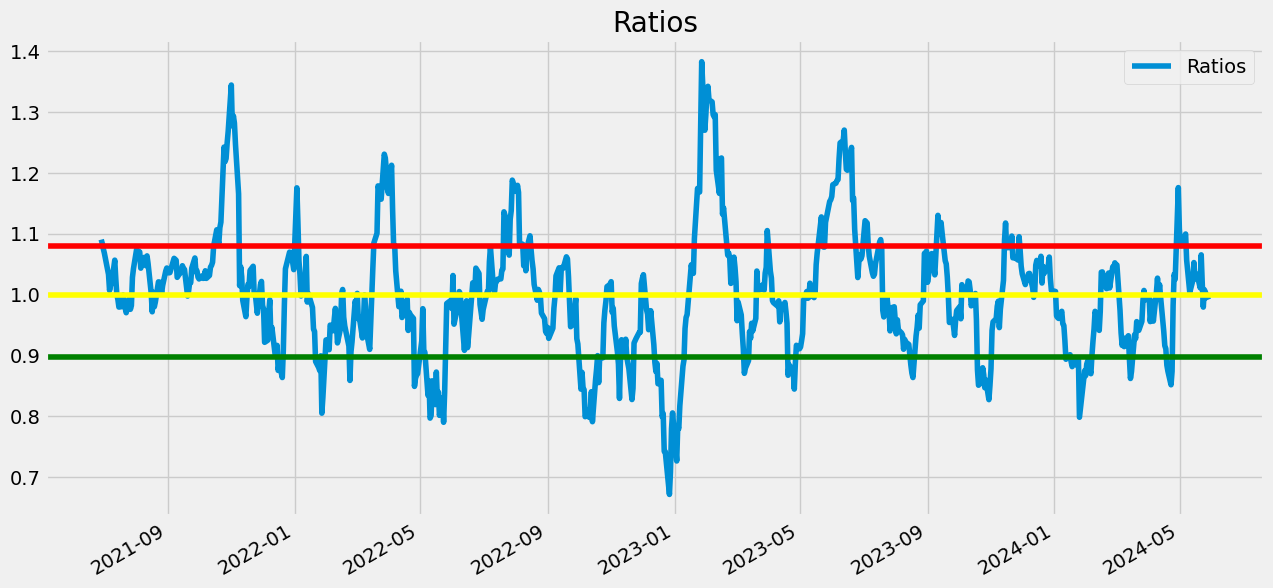

In [29]:
# Plot the ratios
plt.figure(figsize=(14,7))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend = True)
plt.axhline(Percentile_values[0], c= 'green', label = '15th percentile')
plt.axhline(Percentile_values[2], c= 'yellow', label = '50th percentile')
plt.axhline(Percentile_values[-1], c= 'red', label = '85th percentile')

In [30]:
# Create the buy and sell signals for the strategy
Sell = Percentile_values[-1] # The 85th percentile threshold where we want to sell
Buy = Percentile_values[0] # The 15th percentile threshold where we want to buy
# Put -1 where the ratio is greater than the percentile to sell and nan otherwise
df['Positions'] = np.where(df['Ratios'] > Sell, -1, np.nan)
# Put 1 where the ratio is less than the percentile to buy and put the current value otherwise
df['Positions'] = np.where(df['Ratios'] < Buy, 1, df['Positions'])
# Use ffill to fill the missing values in the data frame. ffill stands for forward fill
df['Positions'] = df['Positions'].ffill()
# Get the buy and sell signals
df['Buy'] = np.where(df['Positions'] == 1, df['Close'], np.nan)
df['Sell'] = np.where(df['Positions'] == -1, df['Close'], np.nan)

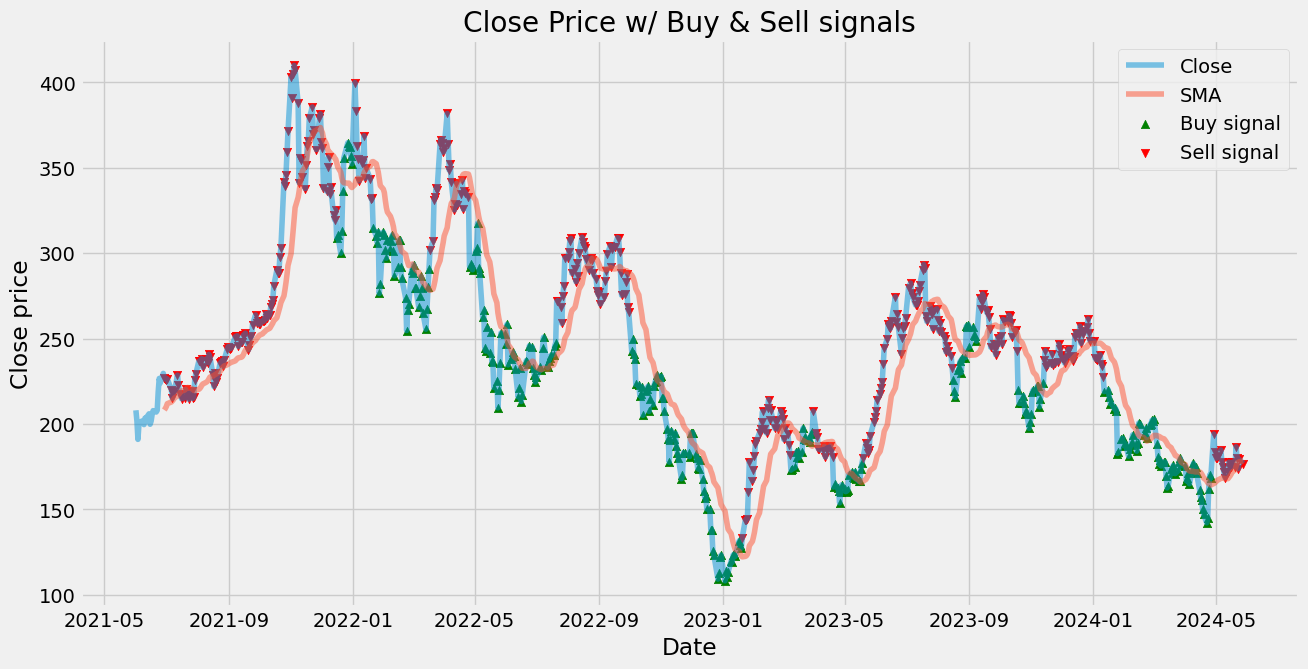

In [31]:
# Visualize the buy and sell signals along with the close price
plt.figure(figsize=(14,7))
plt.title('Close Price w/ Buy & Sell signals')
plt.plot(df['Close'], alpha = 0.5, label = 'Close')
plt.plot(df['SMA'], alpha = 0.5, label = 'SMA')
plt.scatter(df.index, df['Buy'], color = 'green', label = 'Buy signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', label = 'Sell signal', marker = 'v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend()
plt.show()

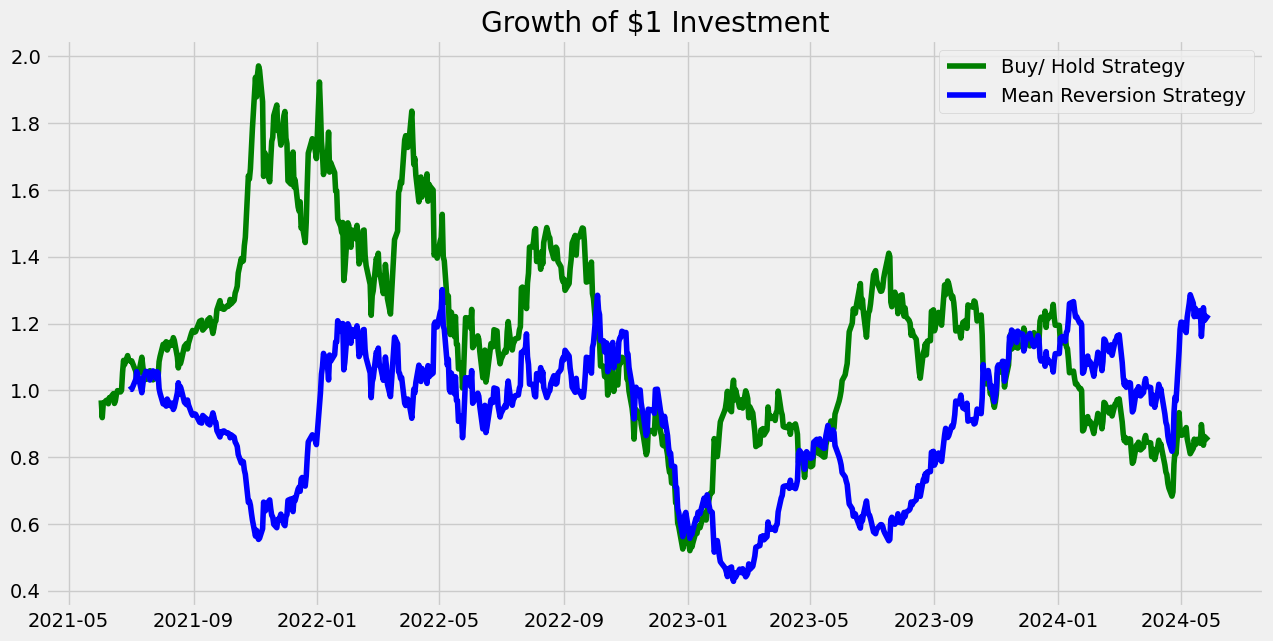

In [32]:
# Calculate the returns for the Mean Reversion Strategy
df['Strategy_returns'] = df['Positions'].shift(1) * df['Log_Returns']
df['Strategy_returns']

# Plot the cumulative log returns & the cumulative Mean Reversion Strategy
plt.figure(figsize=(14,7))
plt.title('Growth of $1 Investment')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), c = 'green', label = 'Buy/ Hold Strategy')
plt.plot(np.exp(df['Strategy_returns'].dropna()).cumprod(), c = 'blue', label = 'Mean Reversion Strategy')
plt.legend()

In [33]:
# Print the returns for both strategies
print('Buy & Hold Strategy Returns: ', np.exp(df['Log_Returns'].dropna()).cumprod()[-1] -1)
print('Mean Reversion Strategy Returns: ', np.exp(df['Strategy_returns'].dropna()).cumprod()[-1] -1)

Buy & Hold Strategy Returns:  -0.15010415611810102
Mean Reversion Strategy Returns:  0.22604869316884857


/tmp/ipykernel_5969/1192778622.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Buy & Hold Strategy Returns: ', np.exp(df['Log_Returns'].dropna()).cumprod()[-1] -1)
/tmp/ipykernel_5969/1192778622.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Mean Reversion Strategy Returns: ', np.exp(df['Strategy_returns'].dropna()).cumprod()[-1] -1)
